In [7]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
# Set the seed for reproducibility
np.random.seed(42)

# Define parameters
n = 100  # Number of observations
mean = 0  # Constant mean
variance = 1  # Constant variance
seasonal_period = 10  # Periodicity of the seasonal component

# Simulate a time series
time_series = mean + np.sqrt(variance) * np.random.randn(n)
seasonal_component = np.sin(np.linspace(0, 2 * np.pi * n / seasonal_period, n)) * np.linspace(1, 2, n)
time_series_with_seasonality = time_series + seasonal_component

In [4]:
# Calculate and print mean and variance
print("Mean:", np.mean(time_series_with_seasonality))
print("Variance:", np.var(time_series_with_seasonality))

# Calculate and print covariance at different lags
covariances = {lag: np.cov(time_series_with_seasonality[:-lag], time_series_with_seasonality[lag:])[0, 1] for lag in range(1, seasonal_period)}
for lag, cov in covariances.items():
    print(f"Covariance with lag {lag}:", cov)

Mean: -0.11907038411155771
Variance: 2.019359987579022
Covariance with lag 1: 0.9763292907437388
Covariance with lag 2: 0.3524174378511058
Covariance with lag 3: -0.3893756821223737
Covariance with lag 4: -1.0240147024361397
Covariance with lag 5: -1.018199786501083
Covariance with lag 6: -0.953415604709956
Covariance with lag 7: -0.30395256925757463
Covariance with lag 8: 0.34572115385945695
Covariance with lag 9: 1.0256755005891895


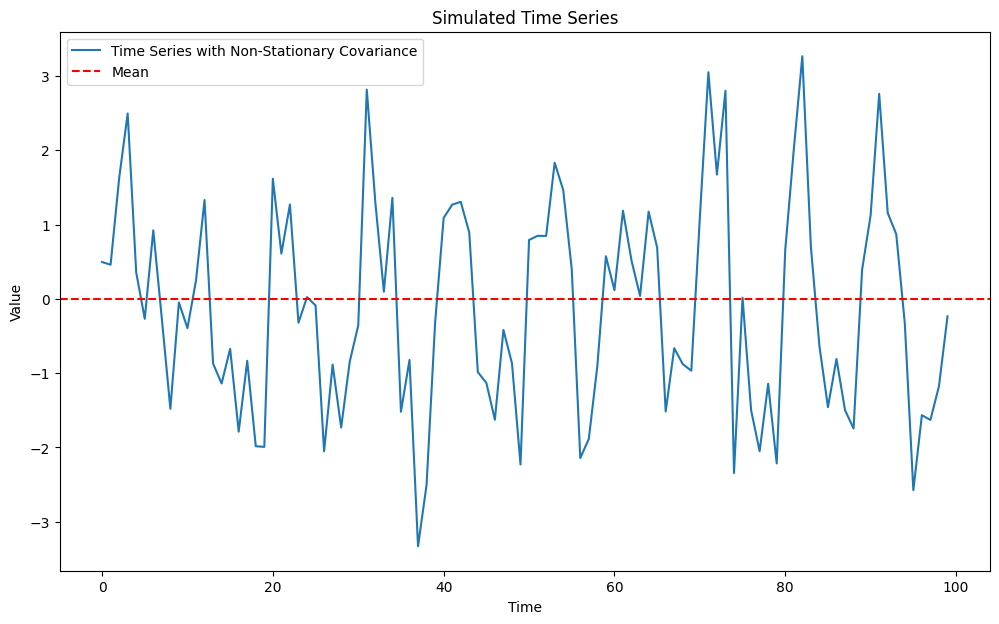

In [6]:
plt.figure(figsize=(12, 7))
plt.plot(time_series_with_seasonality, label='Time Series with Non-Stationary Covariance')
plt.axhline(mean, color='red', linestyle='--', label='Mean')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Simulated Time Series')
plt.legend()
plt.show()

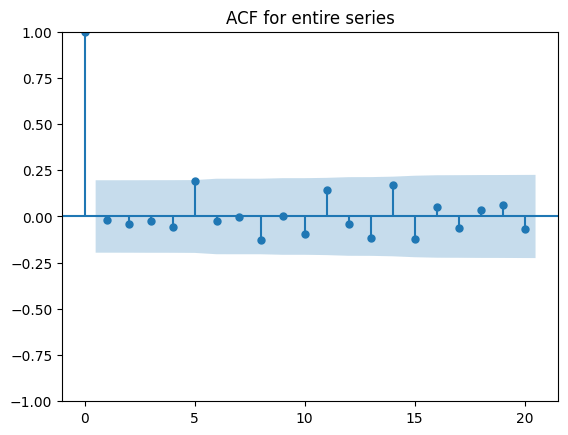

In [8]:
# Plot ACF for the entire series
plot_acf(time_series, lags=20, title='ACF for entire series')
plt.show()

In [9]:
# Perform Ljung-Box test
lbvalue, pvalue = acorr_ljungbox(time_series, lags=[10], return_df=False)
print(f"Ljung-Box test statistic: {lbvalue}")
print(f"Ljung-Box p-value: {pvalue}")

Ljung-Box test statistic: [7.46825554]
Ljung-Box p-value: [0.6806217]
